In [9]:
import pandas as pd
from pathlib import Path
import glob, os
import os.path

# https://github.com/pemagrg1/text-classification

In [10]:
df = pd.read_pickle("./compilation_clean.pkl")
print(len(df)," elements")

4034  elements


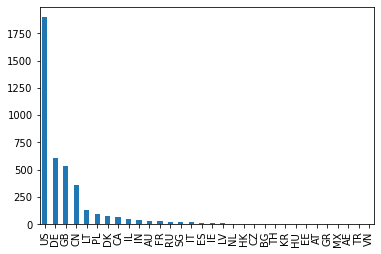

In [11]:
df.Country.value_counts().plot(kind='bar')

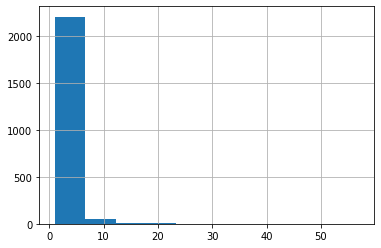

In [12]:
df.value.value_counts().hist()

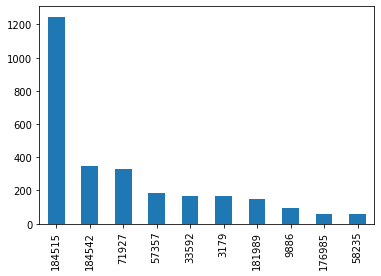

In [13]:
df.PrimaryCategoryID.value_counts()[:10].plot(kind='bar')

In [14]:
DFxl = df[["value","_currencyID","ViewItemURLForNaturalSearch","Title","PrimaryCategoryID","Country","Description"]].reset_index()
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk("/home/kelu/ultrasound/ebaystrove/images/") for f in filenames if os.path.splitext(f)[1] == '.jpg']
imagesID = [x.split(".")[-2].split("/")[-1] for x in images]
LIMIT = len('/home/kelu/ultrasound/ebaystrove/images/233384138652.jpg')
L = len("/home/kelu/ultrasound/ebaystrove/images/")
DFxl["group"] = "None"
for k in images:
    if len(k) > (LIMIT + 1):
        ID = k.split("/")[-1].split(".")[-2]
        DFxl["group"].loc[DFxl.ItemID == ID] = k.split("/")[-2]

In [15]:
DFxl.head()

,ItemID,value,_currencyID,ViewItemURLForNaturalSearch,Title,PrimaryCategoryID,Country,Description,group
0,132529667929,164.77,USD,https://www.ebay.com/itm/Philips-ATL-Dio-Stift...,Philips ATL Dio Stiftsonde CW Doppler Pencil P...,71927,DE,Philips ATL Dio Stiftsonde CW 3.2 MM ...,MechProbe
1,112314171710,326.79,USD,https://www.ebay.com/itm/Kretz-Endovaginal-5-0...,Kretz Endovaginal 5.0 MHz E.V 48 HD Ultrascha...,71927,DE,"Kretz Endovaginalsonde 5.0 MHz, Typ: E. V 48 H...",Array
2,372840599500,24.92,USD,https://www.ebay.com/itm/MOSKVICH-21412-1-6-80...,FOR MOSKVICH 21412 1.6 80HP -97 NEW GATES THER...,63711,GB,A to Z Motor Spares (Wakefield) Step1. C...,NotUS
3,324091756506,1745.82,USD,https://www.ebay.com/itm/GE-546L-Ultrasound-Pr...,GE 546L Ultrasound Probe / Transducer,184515,US,546L transducerCompatible SystemsGE 546L line...,Array
4,173300186560,19.25,USD,https://www.ebay.com/itm/Comline-Front-Right-S...,Comline Front Right Stabiliser Link Bar CSL604...,33592,GB,Comline Stabiliser Link BarIn order to check t...,NotUS


In [16]:
DFxl.to_excel("learning.xlsx", sheet_name='learning') 